# Bài toán phân loại tình trạng ung thư vú: Lành tính - Ác tính

## 1. Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Thu thập và phân tích dữ liệu

### Thu thập

In [2]:
df = pd.read_csv('C:/Users/Vinh/Desktop/Project_ML/data.csv')

### Phân tích

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840
1,842517,M,20.57,17.77,132.90,1326.0,0.08474
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960
3,84348301,M,11.42,20.38,77.58,386.1,0.14250
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030


In [4]:
df.shape

(569, 7)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean'],
      dtype='object')

-> Trong tập dữ liệu có 569 hàng và 7 cột (thuộc tính)

### Loại bỏ cột dư thừa

In [6]:
# Không cần cột Id -> Bỏ cột Id khỏi ma trận thuộc tính X
df.drop("id", axis = 1, inplace=True)

### Loại bỏ cột có chưa giá trị bị thiếu 

In [7]:
df.isna().sum()

diagnosis          0
radius_mean        0
texture_mean       0
perimeter_mean     0
area_mean          0
smoothness_mean    0
dtype: int64

In [8]:
df.dropna(axis=1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,M,17.99,10.38,122.80,1001.0,0.11840
1,M,20.57,17.77,132.90,1326.0,0.08474
2,M,19.69,21.25,130.00,1203.0,0.10960
3,M,11.42,20.38,77.58,386.1,0.14250
4,M,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100
565,M,20.13,28.25,131.20,1261.0,0.09780
566,M,16.60,28.08,108.30,858.1,0.08455
567,M,20.60,29.33,140.10,1265.0,0.11780


In [9]:
# Thông tin về các thuộc tính
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        569 non-null    object 
 1   radius_mean      569 non-null    float64
 2   texture_mean     569 non-null    float64
 3   perimeter_mean   569 non-null    float64
 4   area_mean        569 non-null    float64
 5   smoothness_mean  569 non-null    float64
dtypes: float64(5), object(1)
memory usage: 26.8+ KB


<h2> Bài toán phân loại tình trạng ung thư vú: Lành tính - Ác tính </h2>

- Có 6 feature trong tập dữ liệu

- Tất cả các feature đều thuộc loại rời rạc

- Trong số tất cả 6 feature, feature đầu tiên 'diagnosis' là biến mục tiêu và 5 feature tiếp theo là biến thuộc tính 

### Chuyển đổi diagnosis về dạng 0(lành tính) hoặc 1(ác tính)

In [10]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'].astype(str))
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        569 non-null    int32  
 1   radius_mean      569 non-null    float64
 2   texture_mean     569 non-null    float64
 3   perimeter_mean   569 non-null    float64
 4   area_mean        569 non-null    float64
 5   smoothness_mean  569 non-null    float64
dtypes: float64(5), int32(1)
memory usage: 24.6 KB


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,1,17.99,10.38,122.80,1001.0,0.11840
1,1,20.57,17.77,132.90,1326.0,0.08474
2,1,19.69,21.25,130.00,1203.0,0.10960
3,1,11.42,20.38,77.58,386.1,0.14250
4,1,20.29,14.34,135.10,1297.0,0.10030
5,1,12.45,15.70,82.57,477.1,0.12780
6,1,18.25,19.98,119.60,1040.0,0.09463
7,1,13.71,20.83,90.20,577.9,0.11890
8,1,13.00,21.82,87.50,519.8,0.12730
9,1,12.46,24.04,83.97,475.9,0.11860


### Loại bỏ dữ liệu ngoại biên (Chỉ thực hiện lọc đối với dữ liệu lành tính)

In [11]:
# Tách dữ liệu lành tính với ác tính 
benign_data = df.loc[df['diagnosis'] == 0]
malignant_data = df.loc[df['diagnosis'] == 1]
benign_data.info()
benign_data.head(50)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 19 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        357 non-null    int32  
 1   radius_mean      357 non-null    float64
 2   texture_mean     357 non-null    float64
 3   perimeter_mean   357 non-null    float64
 4   area_mean        357 non-null    float64
 5   smoothness_mean  357 non-null    float64
dtypes: float64(5), int32(1)
memory usage: 18.1 KB


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
19,0,13.540,14.36,87.46,566.3,0.09779
20,0,13.080,15.71,85.63,520.0,0.10750
21,0,9.504,12.44,60.34,273.9,0.10240
37,0,13.030,18.42,82.61,523.8,0.08983
46,0,8.196,16.84,51.71,201.9,0.08600
48,0,12.050,14.63,78.04,449.3,0.10310
49,0,13.490,22.30,86.91,561.0,0.08752
50,0,11.760,21.60,74.72,427.9,0.08637
51,0,13.640,16.34,87.21,571.8,0.07685
52,0,11.940,18.24,75.71,437.6,0.08261


In [12]:
def remover_outliers(dataframe):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'float64':
            q1 = dataframe[col].quantile(0.25)
            q3 = dataframe[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    return dataframe

benign_data = remover_outliers(benign_data)
benign_data.head(50)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
19,0,13.540,14.36,87.46,566.3,0.09779
20,0,13.080,15.71,85.63,520.0,0.10750
21,0,9.504,12.44,60.34,273.9,0.10240
37,0,13.030,18.42,82.61,523.8,0.08983
46,0,8.196,16.84,51.71,201.9,0.08600
48,0,12.050,14.63,78.04,449.3,0.10310
49,0,13.490,22.30,86.91,561.0,0.08752
50,0,11.760,21.60,74.72,427.9,0.08637
51,0,13.640,16.34,87.21,571.8,0.07685
52,0,11.940,18.24,75.71,437.6,0.08261


### Thống kê tập dữ liệu

In [13]:
cancer = pd.concat([benign_data, malignant_data]).reset_index(drop=True)
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        540 non-null    int32  
 1   radius_mean      540 non-null    float64
 2   texture_mean     540 non-null    float64
 3   perimeter_mean   540 non-null    float64
 4   area_mean        540 non-null    float64
 5   smoothness_mean  540 non-null    float64
dtypes: float64(5), int32(1)
memory usage: 23.3 KB


In [14]:
# count - số lượng bản ghi
# mean - giá trị trung bình
# median - giá trị trung vị
# standard deviation - độ lệch chuẩn
# quartiles - giá trị chia tập dữ liệu thành 4 phần bằng nhau
# maximum - giá trị tối đa
# minimum - giá trị tối thiểu

cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,0.392593,14.223552,19.029981,92.666389,663.624815,0.096713
std,0.488780,3.533219,3.974739,24.379322,355.584203,0.013420
min,0.000000,7.691000,9.710000,48.340000,170.400000,0.062510
25%,0.000000,11.740000,16.170000,75.482500,423.425000,0.086820
50%,0.000000,13.435000,18.750000,86.965000,554.300000,0.096715
75%,1.000000,16.022500,21.545000,105.725000,794.350000,0.105400
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.144700


## 3. Trực quan hoá dữ liệu

### Kiểm tra tần suất và tần số các giá trị của biến mục tiêu diagnosis

In [15]:
# Tần suất
cancer['diagnosis'].value_counts()

0    328
1    212
Name: diagnosis, dtype: int64

In [16]:
# Tần số
(df['diagnosis'].value_counts() / float(len(df))) * 100

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

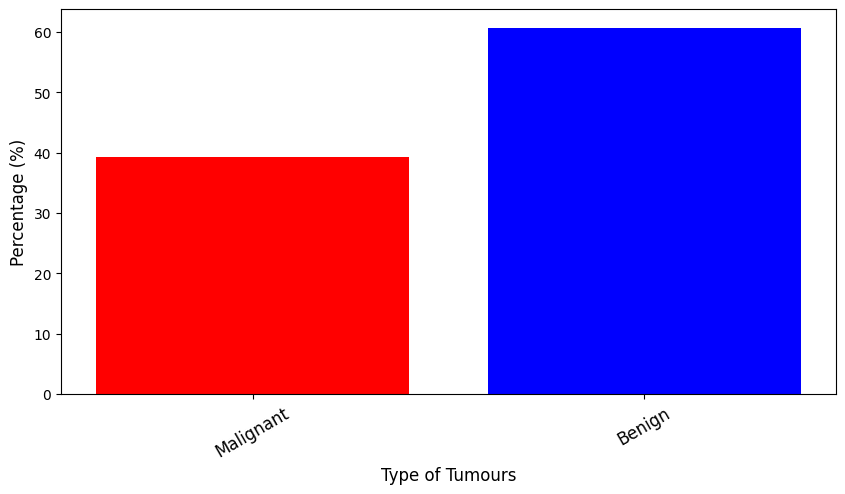

In [17]:
malignant_perc = (212/540) *100
benign_perc = (328/540) *100

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(['Malignant', 'Benign'], [malignant_perc, benign_perc], color=['red', 'blue'])
ax.set_xticklabels(['Malignant', 'Benign'], fontsize=12, rotation=30)
ax.set_xlabel('Type of Tumours', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
plt.show()

#### Ước lượng hệ số tương quan

In [18]:
correlation = cancer.corr()


In [19]:
# Kiểm tra sự tương quan giữa từng thuộc tính với biến mục tiêu (Class)
correlation['diagnosis'].sort_values(ascending=False)

diagnosis          1.000000
perimeter_mean     0.749236
radius_mean        0.737753
area_mean          0.712294
texture_mean       0.521302
smoothness_mean    0.370886
Name: diagnosis, dtype: float64

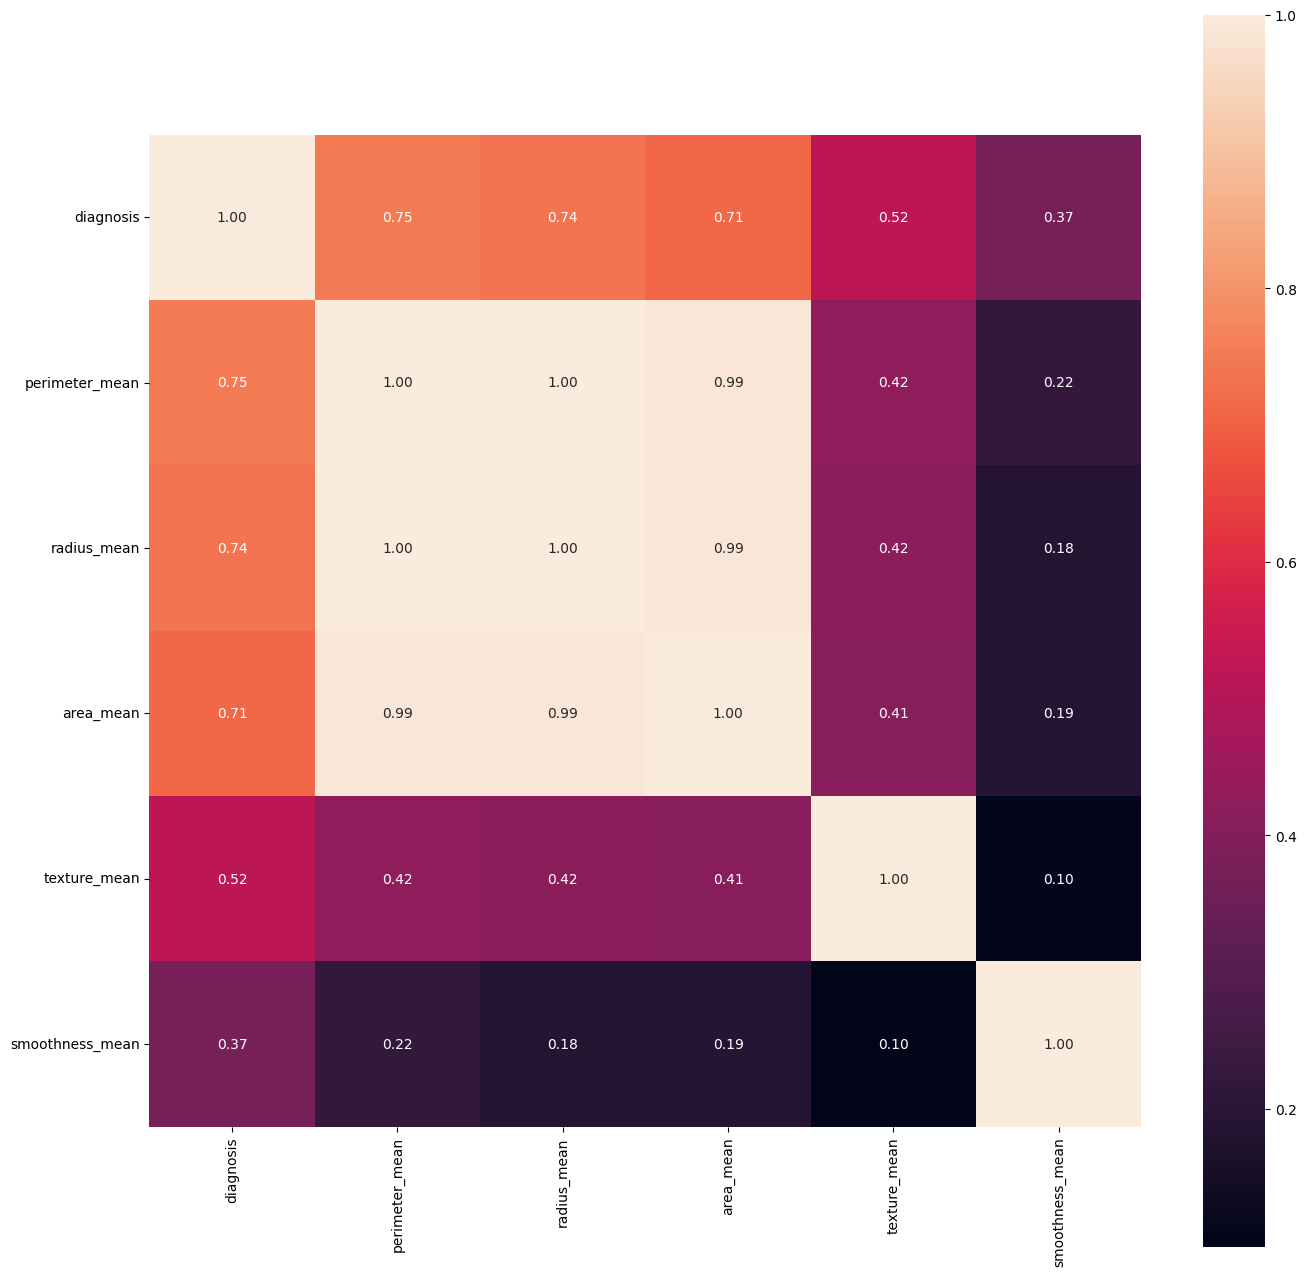

In [20]:
# Kiểm tra hệ số tương quan giữa các biến 
plt.figure(figsize=(16,16))
columns = cancer.corr().nlargest(32, 'diagnosis')['diagnosis'].index
correlation_matrix = np.corrcoef(cancer[columns].values.T)
heatmap = sns.heatmap(correlation_matrix, cbar=True, annot=True, square=True, fmt='.2f')
heatmap.set_yticklabels(columns.values, rotation=0)
heatmap.set_xticklabels(columns.values, rotation=90)
plt.show()

<h4> Giải thích </h4>  

- Hệ số tương quan nằm trong khoảng từ -1 đến +1

- Khi gần với +1: Có mối tương quan đồng biến
-> diagnosis - perimeter_mean, diagnosis - radius_mean, diagnosis - area_mean

- Khi gần với -1: Có mối tương quan nghịch biến  

- Khi gần với 0: Không có mối tương quan

- Nhận xét: Tất cả các biến đều tương quan đồng biến với biến diagnosis

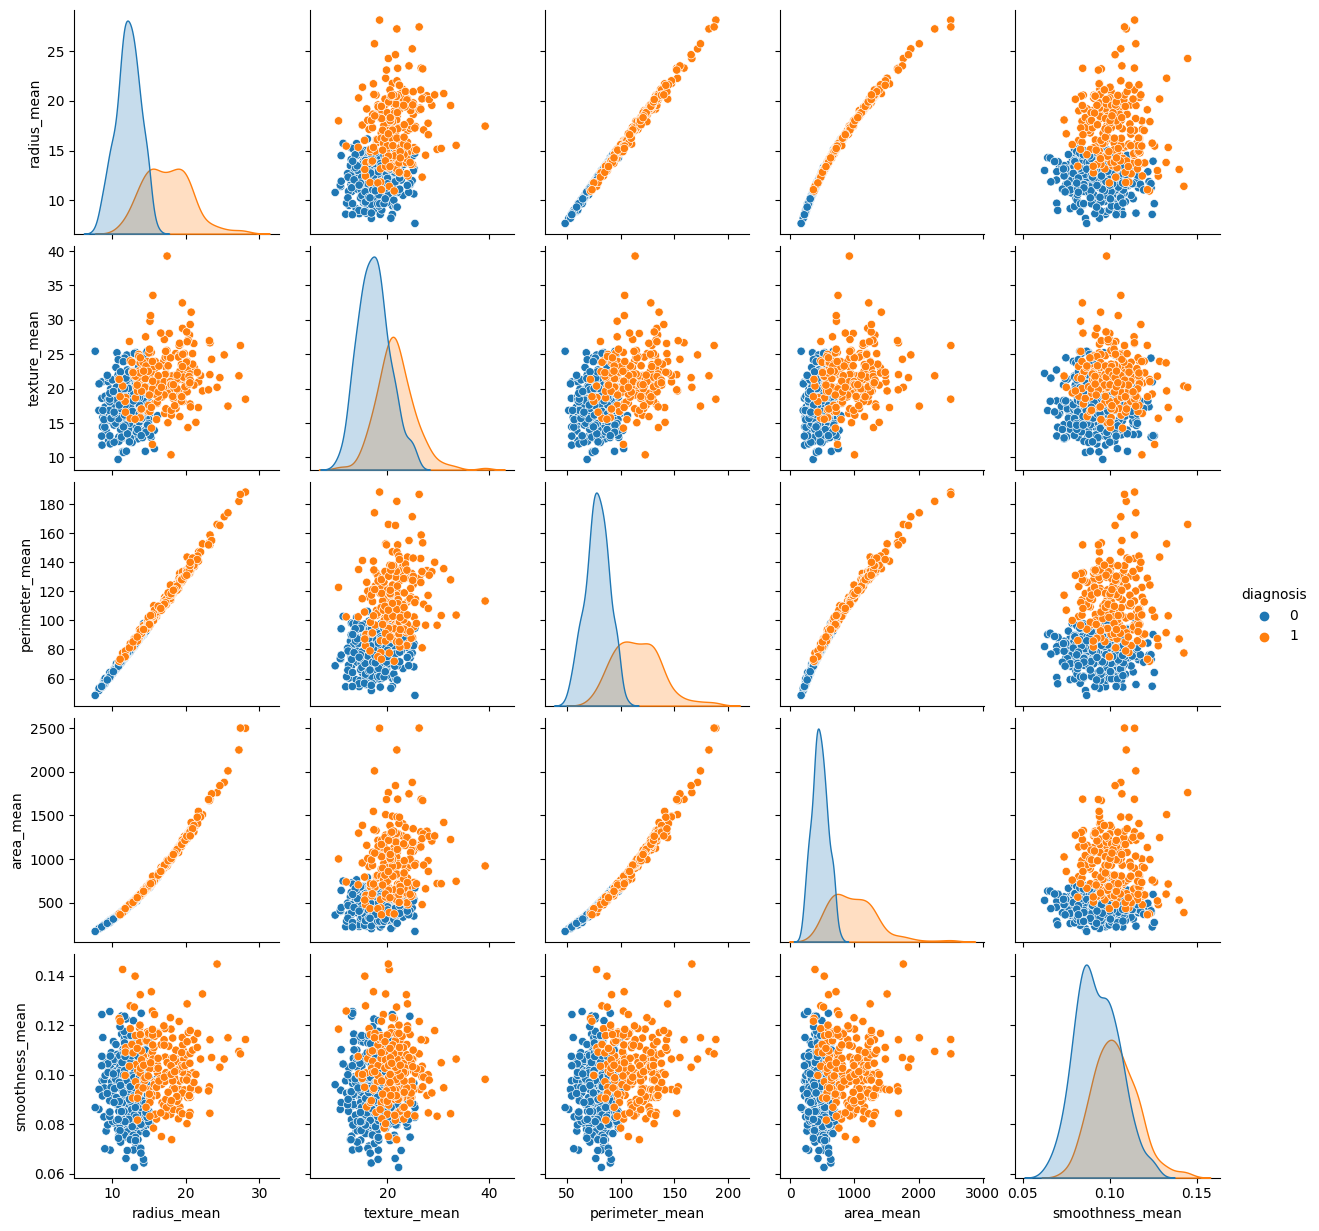

In [21]:
sns.pairplot(cancer, hue="diagnosis")
plt.rcParams['legend.fontsize'] = 12
plt.show()

## 4. Chia tập dữ liệu 

In [22]:
X = cancer.drop(['diagnosis'], axis=1)
y = cancer['diagnosis']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((432, 5), (432,), (108, 5), (108,))

### Chuẩn hóa dữ liệu

In [25]:
scaler = StandardScaler()
cols = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()
X_test.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
count,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02,1.080000e+02
mean,-1.583096e-16,-1.868361e-16,3.741863e-16,-2.734438e-16,-2.145403e-15
std,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00,1.004662e+00
min,-1.738922e+00,-2.193815e+00,-1.664869e+00,-1.387233e+00,-2.208402e+00
25%,-7.288463e-01,-7.772826e-01,-7.482463e-01,-7.246063e-01,-8.358160e-01
50%,-2.232306e-01,-3.023208e-02,-2.248829e-01,-3.475348e-01,7.686752e-02
75%,7.540522e-01,7.013046e-01,7.121609e-01,6.770110e-01,7.487098e-01
max,2.679003e+00,3.238412e+00,2.622669e+00,3.265778e+00,2.587480e+00


In [26]:
print(X_train.head)
print(y_train.head)

<bound method NDFrame.head of     radius_mean texture_mean perimeter_mean area_mean smoothness_mean
0     -0.761230    -0.079733      -0.787167 -0.705263       -0.112619
1      0.281925     2.953123       0.439477  0.147839        0.582681
2      0.439807    -0.299468       0.447638  0.325441        0.022659
3      1.790270    -0.330129       1.643269  1.835478       -0.876285
4     -0.391897     0.834978      -0.300753 -0.444262        0.873601
..          ...          ...            ...       ...             ...
427   -0.555419    -0.286693      -0.585991 -0.563126       -0.745370
428   -0.146615    -0.363345      -0.198737 -0.256131        0.197211
429   -0.642818    -0.210041      -0.690456 -0.626021       -1.031200
430    0.538484    -0.302023       0.586380  0.398034        0.524497
431   -1.348780    -0.189601      -1.338871 -1.066564        0.299033

[432 rows x 5 columns]>
<bound method NDFrame.head of 10     0
534    1
339    1
329    1
445    1
      ..
70     0
277    0
9  

In [27]:
X_test.head
y_test.head

<bound method NDFrame.head of 71     0
391    1
493    1
233    0
140    0
      ..
240    0
313    0
354    1
276    0
320    0
Name: diagnosis, Length: 108, dtype: int32>

## 5. Huấn luyện mô hình 

### Decision Tree

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print('Model score: {0:0.4f}'. format(dtc.score(X_test, y_test)*100),"%")

Model score: 93.5185 %


In [29]:
# Kiểm tra Quá khớp (Overfitting) - Chưa khớp (Underfitting)
print('Training set score: {:.4f}'.format(dtc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dtc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9352


In [30]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_dtc)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
precision = TP / float(TP + FP)
print('\nPrecision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('\nRecall : {0:0.4f}'.format(recall))
f1_score = 2/(1/precision + 1/recall)
print('\nF1_Score: {0:0.4f}'.format(f1_score))

Confusion matrix

 [[59  5]
 [ 2 42]]

True Positives(TP) =  59

True Negatives(TN) =  42

False Positives(FP) =  5

False Negatives(FN) =  2

Precision : 0.9219

Recall : 0.9672

F1_Score: 0.9440


- TP (true positive): Số lượng các ví dụ thuộc lớp c được phân loại chính xác vào lớp c

- FP (false positive): Số lượng các ví dụ không thuộc lớp c bị phân loại nhầm vào lớp c

- TN (true negative): Số lượng các ví dụ không thuộc lớp c được phân loại (chính xác)

- FN (false negative): Số lượng các ví dụ thuộc lớp c bị phân loại nhầm (vào các lớp khác c)

<AxesSubplot: >

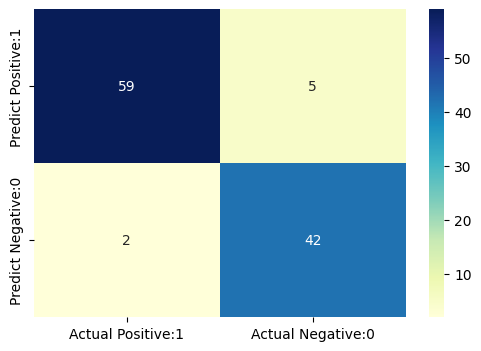

In [31]:
# Vẽ ma trận nhầm lẫn trên bản đồ nhiệt
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Random Forest

In [32]:
random = RandomForestRegressor()
random.fit(X_train, y_train)
y_pred_ran = random.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(random.score(X_test, y_test)*100),"%")

Model accuracy score: 84.6207 %


In [33]:
# Kiểm tra Quá khớp (Overfitting) - Chưa khớp (Underfitting)
print('Training set score: {:.4f}'.format(random.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(random.score(X_test, y_test)))

Training set score: 0.9702
Test set score: 0.8462


In [34]:
# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, np.round(abs(y_pred_ran)))

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
precision = TP / float(TP + FP)
print('\nPrecision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('\nRecall : {0:0.4f}'.format(recall))
f1_score = 2/(1/precision + 1/recall)
print('\nF1_Score: {0:0.4f}'.format(f1_score))

Confusion matrix

 [[61  3]
 [ 3 41]]

True Positives(TP) =  61

True Negatives(TN) =  41

False Positives(FP) =  3

False Negatives(FN) =  3

Precision : 0.9531

Recall : 0.9531

F1_Score: 0.9531


<AxesSubplot: >

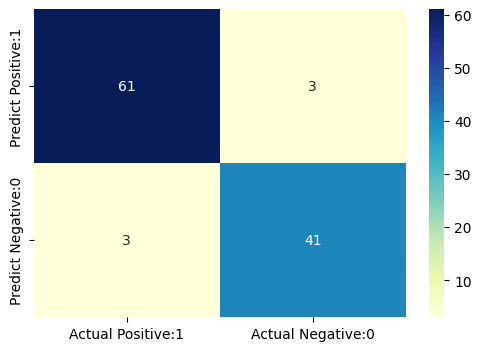

In [35]:
# Vẽ ma trận nhầm lẫn trên bản đồ nhiệt
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### SVM

In [36]:
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(svm_model.score(X_test, y_test)*100),"%")

Model accuracy score: 85.8089 %


In [37]:
# Kiểm tra Quá khớp (Overfitting) - Chưa khớp (Underfitting)
print('Training set score: {:.4f}'.format(svm_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svm_model.score(X_test, y_test)))

Training set score: 0.8009
Test set score: 0.8581


In [38]:
# Ma trận nhầm lẫn

cm = confusion_matrix(y_test, np.round(abs(y_pred_svm)))

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

precision = TP / float(TP + FP)
print('\nPrecision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nRecall : {0:0.4f}'.format(recall))

f1_score = 2/(1/precision + 1/recall)
print('\nF1_Score: {0:0.4f}'.format(f1_score))

Confusion matrix

 [[63  1]
 [ 3 41]]

True Positives(TP) =  63

True Negatives(TN) =  41

False Positives(FP) =  1

False Negatives(FN) =  3

Precision : 0.9844

Recall : 0.9545

F1_Score: 0.9692


<AxesSubplot: >

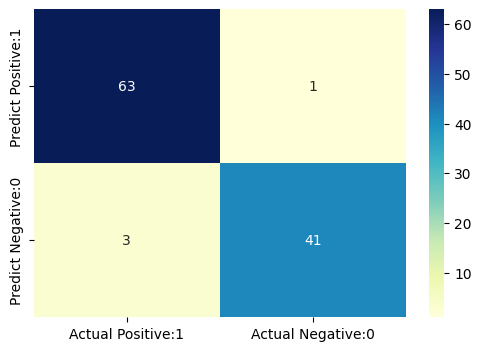

In [39]:
# Vẽ ma trận nhầm lẫn trên bản đồ nhiệt
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## KNN

### K = 3

In [40]:
knn_3 = KNeighborsClassifier(n_neighbors=45)
knn_3.fit(X_train, y_train)
y_pred_knn3 = knn_3.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(knn_3.score(X_test, y_test)*100),"%")

Model accuracy score: 97.2222 %


In [41]:
# Kiểm tra Quá khớp (Overfitting) - Chưa khớp (Underfitting)
print('Training set score: {:.4f}'.format(knn_3.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_3.score(X_test, y_test)))

Training set score: 0.9306
Test set score: 0.9722


In [42]:
# Ma trận nhầm lẫn

cm = confusion_matrix(y_test, y_pred_knn3)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

precision = TP / float(TP + FP)
print('\nPrecision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nRecall : {0:0.4f}'.format(recall))

f1_score = 2/(1/precision + 1/recall)
print('\nF1_Score: {0:0.4f}'.format(f1_score))

Confusion matrix

 [[64  0]
 [ 3 41]]

True Positives(TP) =  64

True Negatives(TN) =  41

False Positives(FP) =  0

False Negatives(FN) =  3

Precision : 1.0000

Recall : 0.9552

F1_Score: 0.9771


<AxesSubplot: >

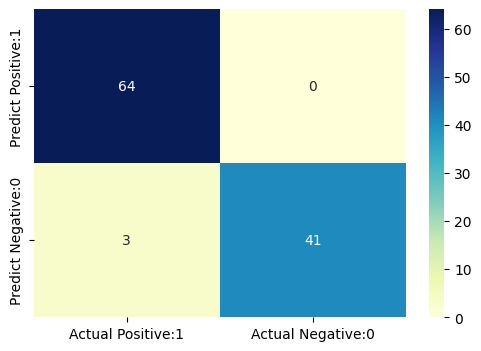

In [43]:
# Vẽ ma trận nhầm lẫn trên bản đồ nhiệt
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### k = 5

In [44]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train, y_train)

y_pred_5 = knn_5.predict(X_test)

print('Model accuracy score with k=5 : {0:0.4f}'. format(knn_5.score(X_test, y_test)))

Model accuracy score with k=5 : 0.9537


### k = 6

In [45]:
knn_6 = KNeighborsClassifier(n_neighbors=6)

knn_6.fit(X_train, y_train)

y_pred_6 = knn_6.predict(X_test)

print('Model accuracy score with k=6 : {0:0.4f}'. format(knn_6.score(X_test, y_test)))

Model accuracy score with k=6 : 0.9444


### k = 7

In [46]:
knn_7 = KNeighborsClassifier(n_neighbors=75)

knn_7.fit(X_train, y_train)

y_pred_7 = knn_7.predict(X_test)

print('Model accuracy score with k=7 : {0:0.4f}'. format(knn_7.score(X_test, y_test)))

Model accuracy score with k=7 : 0.9537


In [47]:
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifer': RandomForestRegressor(),
    'KNeighborsClassifier_3': KNeighborsClassifier(n_neighbors=3),
    'KNeighborsClassifier_5': KNeighborsClassifier(n_neighbors=5),
    'KNeighborsClassifier_6': KNeighborsClassifier(n_neighbors=6),
    'KNeighborsClassifier_7': KNeighborsClassifier(n_neighbors=7),
    'Support Vector Machines': SVR()
}

def model_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_score = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train) 
        score = model.score(X_test, y_test)
        model_score[model_name] = score
    return model_score



In [48]:
model_scores = model_score(models, X_train, X_test, y_train, y_test)
model_scores

{'DecisionTreeClassifier': 0.9444444444444444,
 'RandomForestClassifer': 0.8403241477272727,
 'KNeighborsClassifier_3': 0.9537037037037037,
 'KNeighborsClassifier_5': 0.9537037037037037,
 'KNeighborsClassifier_6': 0.9444444444444444,
 'KNeighborsClassifier_7': 0.9351851851851852,
 'Support Vector Machines': 0.8580885894979462}

In [49]:
model_compare = pd.DataFrame(model_scores, index=['Score'])

model_compare.head()

,DecisionTreeClassifier,RandomForestClassifer,KNeighborsClassifier_3,KNeighborsClassifier_5,KNeighborsClassifier_6,KNeighborsClassifier_7,Support Vector Machines
Score,0.944444,0.840324,0.953704,0.953704,0.944444,0.935185,0.858089


<AxesSubplot: >

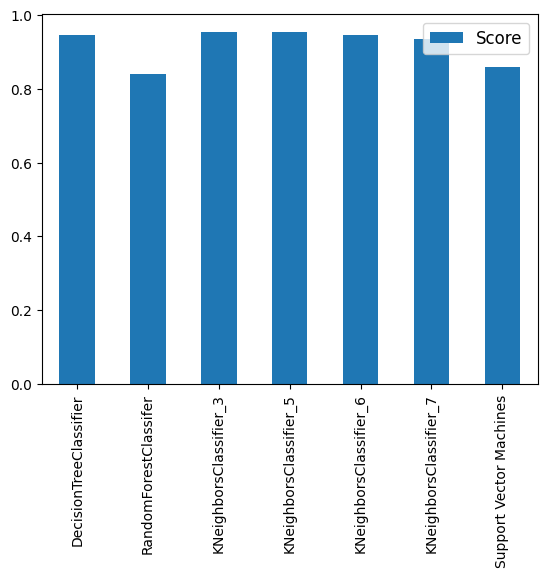

In [50]:
model_compare.T.plot(kind='bar')

## 6. Thay đổi siêu tham số 

In [51]:
dtc = DecisionTreeClassifier()

hyperparameters = {'max_depth': list(range(0,5)),
                #    'min_samples_split': [1, 2, 3, 4, 5, None],
                #    'min_samples_leaf': [1, 2, 3, 4, 5, None],
                   'max_features': list(range(0,5))}

clf = GridSearchCV(dtc, hyperparameters, cv=5)

clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

print('Best hyperparameters:', clf.best_params_)

Best hyperparameters: {'max_depth': 4, 'max_features': 4}


In [52]:
clf.score(X_test, y_test)

0.9537037037037037

In [53]:
# Ma trận nhầm lẫn

cm = confusion_matrix(y_test, y_pred_clf)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

precision = TP / float(TP + FP)
print('\nPrecision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('\nRecall : {0:0.4f}'.format(recall))

f1_score = 2/(1/precision + 1/recall)
print('\nF1_Score: {0:0.4f}'.format(f1_score))

Confusion matrix

 [[61  3]
 [ 2 42]]

True Positives(TP) =  61

True Negatives(TN) =  42

False Positives(FP) =  3

False Negatives(FN) =  2

Precision : 0.9531

Recall : 0.9683

F1_Score: 0.9606


<AxesSubplot: >

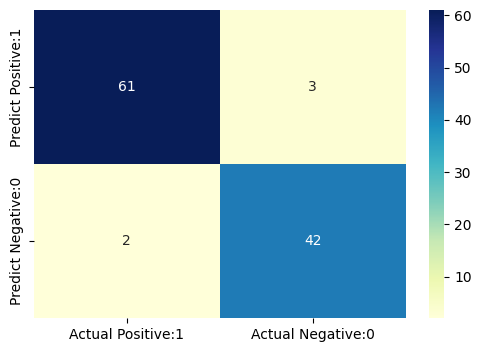

In [54]:
# Vẽ ma trận nhầm lẫn trên bản đồ nhiệt
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, 
                         columns=['Actual Positive:1', 'Actual Negative:0'], 
                         index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [59]:
def predict_breast_cancer(radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean):

    x = np.zeros(len(X.columns))
    x[0] = radius_mean
    x[1] = texture_mean
    x[2] = perimeter_mean
    x[3] = area_mean
    x[4] = smoothness_mean

    return knn_3.predict([x])[0]

In [60]:
prediction_1 = predict_breast_cancer(-1.348780,-0.189601,-1.338871,-1.066564,0.299033)
print(prediction_1)
if(prediction_1 == 0):
    print("Khối u lành tính")
else:
    print("Khối u ác tính")
prediction_2 = predict_breast_cancer(0.538484,-0.302023,0.586380,0.398034,0.524497)
print(prediction_2)
if(prediction_2 == 0):
    print("Khối u lành tính")
else:
    print("Khối u ác tính")

0
Khối u lành tính
1
Khối u ác tính
